In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize']=[10,5]

In [3]:
warnings.simplefilter(action='ignore',category=FutureWarning)

# import data

In [4]:
df = pd.read_csv('titanic.csv')

# Shape of data

In [5]:
df.shape

(891, 12)

# preview of data

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# information of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handle Missing data

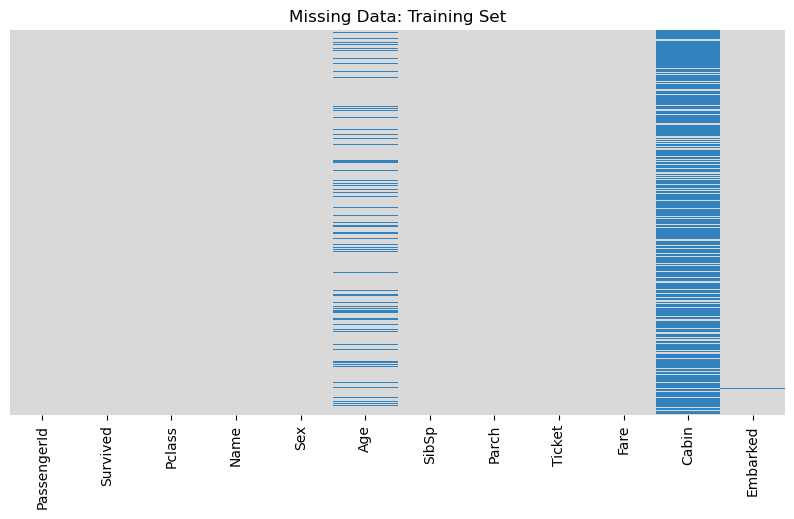

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

### We see that 20% values are missing from age while 80% are missing from cabin. If we go towards removing the values we lost 80% of data only due to cabin values are missing. so instead of removing values we remove cabin column.... while we can handle age column by filling values with mean or meadian after removing outliers

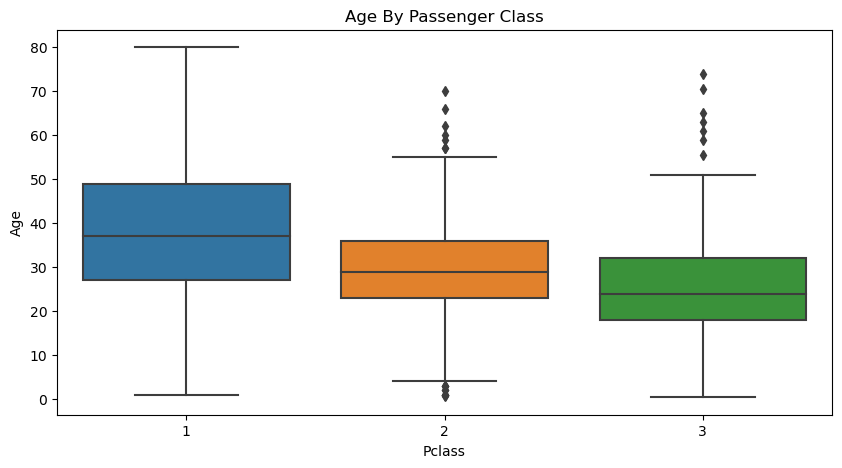

In [9]:
sns.boxplot(x=df['Pclass'],y=df['Age'],data=df,palette='tab10')
plt.title('Age By Passenger Class')
plt.show()

# Function to fill missing values

In [10]:
def impute_age(cols):
    Age = cols[0]
    Class = cols[1]
    if pd.isnull(Age):
        if Class==1:
            return 37
        elif Class==2:
            return 29
        else:
            return 24
    else:
        return Age

# Fill The Age Column on the basis of some calculations

In [11]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

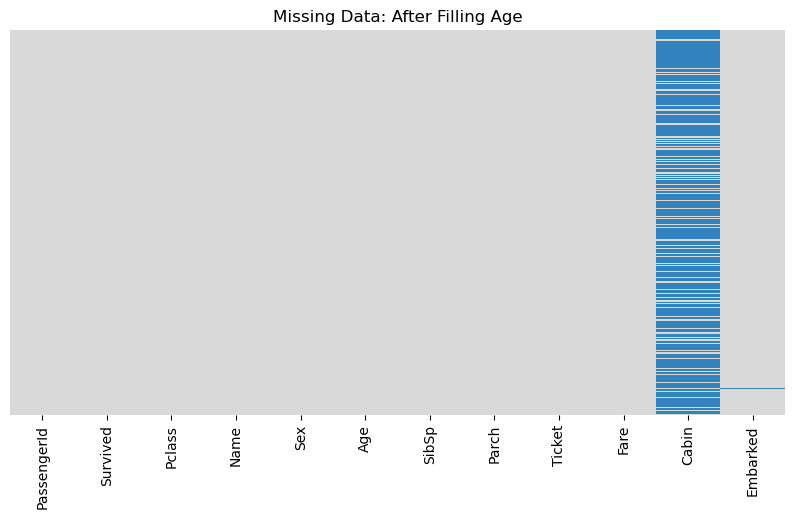

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title('Missing Data: After Filling Age')
plt.show()

# As we see we cann't remove values from cabin b/c 80% of values are missing, so we drop it from our dataset

In [13]:
df.drop('Cabin',axis=1,inplace=True)

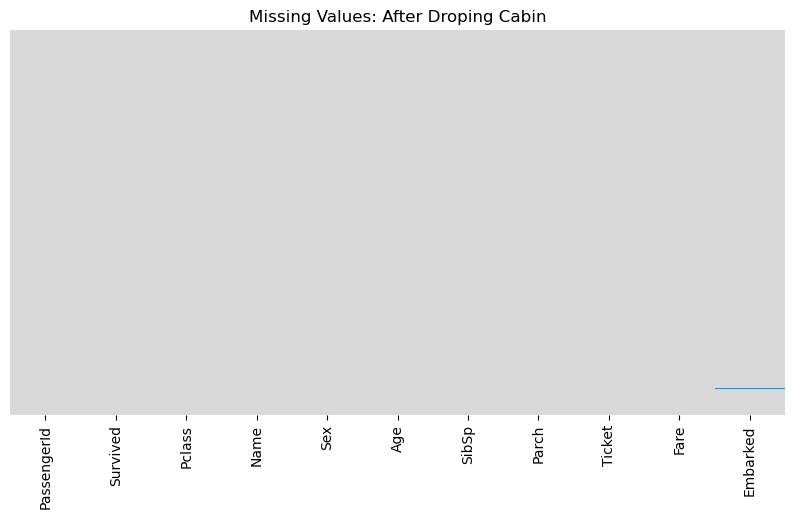

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title("Missing Values: After Droping Cabin")
plt.show()

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### As there is only two rows are missing on Embarked column, then we just remove them from our dataset

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df.shape

(889, 11)

### Now we again analyze our dataset

In [19]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


### As we see than name and ticket does not provide us any information about the survival of person whether he is survive or not, so we also remove them from our dataset

In [20]:
df.drop(df[['Name','Ticket']],axis=1,inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Now we saw that sex and embarked are objects, so we convert them into categorical data

In [22]:
objects = ['Sex','Embarked']
for obj in objects:
    df[obj] = df[obj].astype('category')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### We notice that their is one more column [PassengerID] which is present in dataset with neumeric values but it does not provide us any information about the survival of passenger, So we ..... remove it

In [25]:
df.drop('PassengerId',axis=1,inplace=True)

In [26]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


# Getting Model Ready

In [27]:
df.shape

(889, 8)

#### We select our columns whose dtype is category

In [28]:
df.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

### Convert categorical values into dummy

In [29]:
Sex = pd.get_dummies(df['Sex'],drop_first=True)
Embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
df = pd.concat([df,Sex,Embarked],axis=1)

In [32]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.25,S,1,0,1


 ### As we saw that now we have sex and embarked column in categorical form, so we don't need Sex and Embarked columns any more, so we remove them from our dataset

In [33]:
df.drop(df[['Sex','Embarked']],axis=1,inplace=True)

In [34]:
df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1


### Now we have perfect dataset

### Now we devide our data into training and testing, First initilize x and y

In [35]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [36]:
x.head(1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.25,1,0,1


In [37]:
y.head(1)

0    0
Name: Survived, dtype: int64

#### Now we are ready to splitting data into training and testing

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# Let's train our model

In [39]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

## Accuracy of model

In [42]:
accuracy = round(accuracy_score(y_test,y_pred)*100,2)

In [43]:
accuracy

82.02